 Tal i com vàrem comentar a classe, apliqueu a les dades de dígits LED i les MNIST els mètodes que creieu oportuns, tant els de les dues pràctiques recents (arbres de classificació, bagging, random forests) com altres anteriors o, fins i tot, si voleu, el Naïve Bayes (hi  ha una funció naiveBayes al package e1071, però el podeu codificar vosaltres mateixos).  
No hem comentat encara a classe el Boosting. Ho farem el proper dimarts 3. No l'heu d'aplicar en aquesta tasca.

Procureu documentar bé el que escriviu, i també mesurar la qualitat dels resultats, en particular com varia aquesta en funció de paràmetres que es puguin ajustar, per exemple la complexitat dels arbres en CART o el nombre d'arbres en Bagging/Random Forests.



## Part 1: MNIST

In [48]:
require(keras)

Loading required package: keras


In [49]:
# We obtain and display the MNIST dataset
mnist = dataset_mnist()
str(mnist)

List of 2
 $ train:List of 2
  ..$ x: int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ x: int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:10000(1d)] 7 2 1 0 4 1 4 9 5 9 ...


In [50]:
# We prepare our data, separating into train and test sets
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

# Reshape image matrices into 1-dimensional vectors
dim(x_train) <- c(nrow(x_train), 784)
dim(x_test) <- c(nrow(x_test), 784)

# Normalize pixel values
x_train <- x_train / 255
x_test <- x_test / 255

# Convert our response variables to factors
y_train <- as.factor(y_train)
y_test <- as.factor(y_test)

# Get amount of samples in each set
n_train <- length(y_train)
n_test <- length(y_test)

# Organize our training data in a dataframe
training_data <- data.frame('y' = y_train, 'x' = x_train)

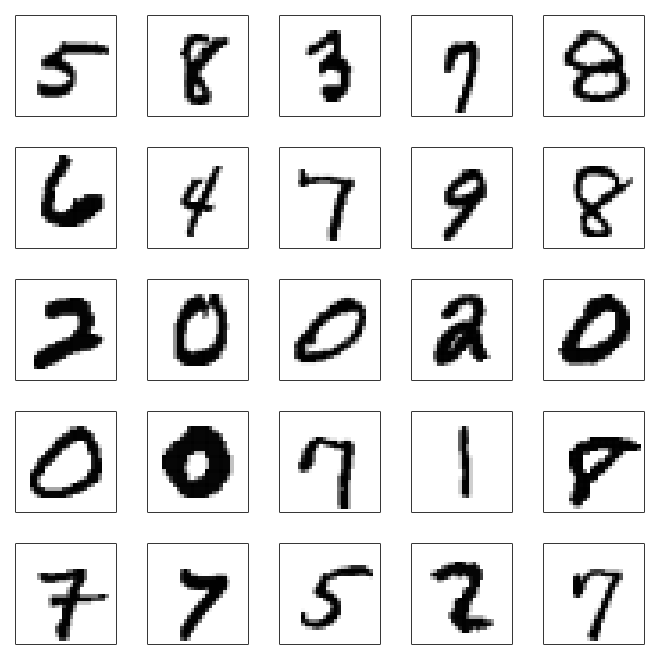

In [4]:
k<-5 
plot.zip.mosaic<-function(k){
old.par<-par(mfrow=c(k,k),mar=c(1,1,1,1))
    Indexes<-sample(n_train,k^2)
    for (i in Indexes) {
        m1<-t(matrix(x_train[i,],nrow=28,ncol=28))[,28:1]
        image(-m1,col=gray((0:255)/255),xaxt="n",yaxt="n")}
    par(old.par)}
options(repr.plot.width=5.5,repr.plot.height=5.5)
plot.zip.mosaic(k)

### Prediction using decision tree

In [9]:
# Fit a tree model with our formula
require(tree)
decision_tree <- tree(y~., data=training_data, control = tree.control(nobs = 800000, mincut = 5, minsize = 10, mindev = 0.01))

Loading required package: tree


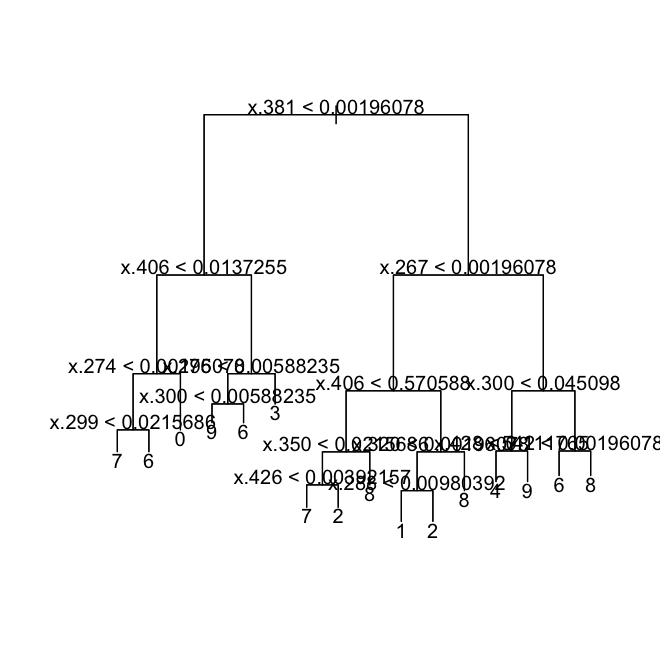

In [6]:
# Visualize our fitted model
plot(decision_tree)
text(decision_tree)

In [7]:
# Let's predict our samples in the x_test dataframe using our newly fitted model
predictions <- predict(decision_tree, data.frame('x' = x_test))
head(predictions)

0,1,2,3,4,5,6,7,8,9
0.036931818,0.001893939,0.01183712,0.009706439,0.019412879,0.022727273,0.007102273,0.861268939,0.0009469697,0.028172348
0.051415455,0.004437643,0.03091048,0.499617445,0.003366488,0.307268554,0.019433818,0.001836266,0.0557000765,0.026013772
0.000282446,0.842395142,0.04886315,0.021465895,0.001412230,0.007202373,0.014404745,0.005225251,0.0569128654,0.001835899
0.749465649,0.003358779,0.06229008,0.037862595,0.002442748,0.060305344,0.046412214,0.033282443,0.0012213740,0.003358779
0.001387444,0.029136316,0.14082553,0.031564343,0.106139438,0.005202914,0.024627125,0.496704821,0.0090183836,0.155393687
0.000282446,0.842395142,0.04886315,0.021465895,0.001412230,0.007202373,0.014404745,0.005225251,0.0569128654,0.001835899


In [8]:
# We proceed to compute the confusion matrix for this prediction tree given our yest values.
# From that, we calculate the accuracy of our model.
predicted_labels <- colnames(predictions)[apply(predictions, 1, which.max)]
confusion_matrix <- table(y_test, predicted_labels)
confusion_matrix

accuracy <- sum(diag(confusion_matrix))/sum(confusion_matrix)
accuracy

      predicted_labels
y_test    0    1    2    3    4    6    7    8    9
     0  807    0    0   47    0   70   29   19    8
     1    0 1031   10    4    0    3   12   51   24
     2   54   79  528   42   19   57   82  151   20
     3   52   11   96  534   15   45   26   69  162
     4    2    2    4    2  506   55   69   84  258
     5   61    5    2  347   54   95   21  131  176
     6   60    7   15   24   29  660   26  123   14
     7   26    4   44    0   10   18  830   29   67
     8    1   30   29   64   18   52    4  710   66
     9    4    2   11   24   34   35   79   78  742

[1] 0.3622

As we can see, the accuracy of our computed model using the default values is very low. Only around 34 in every 100 samples are correctly categorized. It is worth mentioning that the model doesn't even take into account the existence of number 5. We will now proceed to tweak our model's parameters to try to improve it. 

In [9]:
# Using minsize 100, mindev 0.001
decision_tree <- tree(y~., data=training_data, control = tree.control(nobs = 800000, mincut = 50, minsize = 100, mindev = 0.001))

In [10]:
predictions <- predict(decision_tree, data.frame('x' = x_test))
predicted_labels <- colnames(predictions)[apply(predictions, 1, which.max)]
confusion_matrix <- table(y_test, predicted_labels)
accuracy <- sum(diag(confusion_matrix))/sum(confusion_matrix)
accuracy

[1] 0.799

We can see how increasing the amount of nodes of our tree and, at the same time, decreasing the minimum distance between branches produces radically better results.

## Prediction using random forests

In [6]:
require(randomForest)

Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [ ]:
rf <- randomForest(y ~ . , data = training_data)
predictions <- predict(rf, data.frame('x' = x_test))
predicted_labels <- colnames(predictions)[apply(predictions, 1, which.max)]
confusion_matrix <- table(y_test, predicted_labels)
accuracy <- sum(diag(confusion_matrix))/sum(confusion_matrix)
accuracy

## Prediction using bagging

In [4]:
require(ipred)

Loading required package: survival

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



In [ ]:
bag <- bagging(y ~ ., data = training_data, coob=TRUE)
predictions <- predict(bag, data.frame('x' = x_test))
predicted_labels <- colnames(predictions)[apply(predictions, 1, which.max)]
confusion_matrix <- table(y_test, predicted_labels)
accuracy <- sum(diag(confusion_matrix))/sum(confusion_matrix)
accuracy

## Part 2: Seven digits symbols

In [2]:
source("Digits.plot.r")

In [4]:
#install.packages("dplyr",dependencies=TRUE,repos="https://cloud.r-project.org")
require(dplyr)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
digits.data<-read.csv("digits.csv")
str(digits.data)
digits.data$digit<-recode(digits.data$digit,"one"="1","two"="2","three"="3","four"="4","five"="5","six"="6","seven"="7",
                          "eight"="8","nine"="9","zero"="0")

'data.frame':	500 obs. of  8 variables:
 $ digit: Factor w/ 10 levels "eight","five",..: 6 5 3 9 1 5 2 7 9 1 ...
 $ x1   : int  1 0 0 1 0 0 1 1 1 1 ...
 $ x2   : int  0 0 1 1 1 0 1 0 0 1 ...
 $ x3   : int  1 1 1 1 1 1 0 0 1 1 ...
 $ x4   : int  0 0 1 1 1 0 1 1 1 1 ...
 $ x5   : int  0 0 0 1 1 0 0 1 1 0 ...
 $ x6   : int  1 1 1 0 1 1 1 1 0 1 ...
 $ x7   : int  0 0 0 0 1 0 1 1 1 1 ...


In [9]:
digits.data$digit<-recode(digits.data$digit,"one"="1","two"="2","three"="3","four"="4","five"="5","six"="6","seven"="7",
                          "eight"="8","nine"="9","zero"="0")

In [10]:
table(digits.data$digit)


 8  5  4  9  1  7  6  3  2  0 
58 54 52 55 43 48 50 55 43 42 

## Prediction using a regression line

In [11]:
n<-nrow(digits.data)
ntrain<-ceiling(0.8*n)
ntest<-n-ntrain
set.seed(24025)  # some arbitrary value, for the sake of reproducible results
Itrain<-sample(1:n,ntrain,replace=FALSE)
digits.train<-digits.data[Itrain,]
digits.test<-digits.data[-Itrain,]

In [16]:
digits.train.lm<-lm(strtoi(digit)~., data=digits.train)
summary(digits.train.lm)


Call:
lm(formula = strtoi(digit) ~ ., data = digits.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6577 -1.6916 -0.2914  2.2699  6.0079 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.10872    0.54130   2.048  0.04120 *  
x1           2.07078    0.30510   6.787 4.24e-11 ***
x2           1.30056    0.27428   4.742 2.97e-06 ***
x3          -0.03388    0.28741  -0.118  0.90623    
x4           2.00376    0.30182   6.639 1.06e-10 ***
x5          -0.92761    0.26507  -3.499  0.00052 ***
x6           0.84484    0.34998   2.414  0.01624 *  
x7          -0.63705    0.30504  -2.088  0.03741 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.425 on 392 degrees of freedom
Multiple R-squared:  0.2966,	Adjusted R-squared:  0.284 
F-statistic: 23.61 on 7 and 392 DF,  p-value: < 2.2e-16


In [24]:
predict(digits.train.lm, subset(digits.test, select = -digit))

7         9        18        27        30        32        36        39 
6.6916160 3.5847253 1.2826342 1.5809611 5.7640042 6.6916160 5.7301257 7.2947831 
       49        62        64        70        72        74        75        78 
3.2202406 5.7301257 4.4295649 3.4515534 4.4295649 5.3910553 3.7263614 5.3571767 
       79        80        92        95        96        98       105       111 
3.7263614 5.3571767 1.9196799 5.9942224 4.9191646 5.8128978 6.6577375 3.9234441 
      123       129       131       136       142       151       154       155 
4.0243367 5.3571767 3.9904582 3.5847253 7.2947831 5.7640042 3.9904582 3.9904582 
      163       166       188       190       191       197       201       214 
3.5847253 3.6186038 3.9904582 5.7301257 3.9904582 6.6916160 1.9196799 5.9942224 
      225       226       227       230       232       236       237       242 
3.5847253 6.6577375 6.6577375 5.3910553 1.9196799 3.6932259 5.3571767 4.6208377 
      249       251       254       256       264       265       266       272 
5.9942224 6.6577375 3.5524460 5.2240048 4.8852860 0.9920681 5.7301257 5.7301257 
      273       275       278       281       284       295       301       312 
3.7263614 5.7640042 5.7301257 7.3286617 7.2947831 0.8107435 5.7640042 5.3571767 
      314       316       317       332       333       337       340       346 
6.6577375 3.7602399 3.7263614 4.5869592 3.7263614 7.2947831 6.6916160 1.9196799 
      351       357       367       369       376       377       391       393 
3.5847253 3.9904582 6.6577375 6.3671713 5.2240048 6.6916160 5.7301257 3.2863984 
      398       399       403       404       405       411       417       420 
3.7263614 6.6916160 1.0259466 5.8467763 5.7301257 5.0666106 5.2240048 7.3286617 
      422       428       437       456       458       465       467       471 
5.3910553 5.7301257 1.9196799 5.3571767 3.6932259 4.3302716 5.7301257 1.9196799 
      473       475       483       489 
5.7640042 6.6916160 5.3571767 6.6916160

## Using decision trees

In [25]:
require(rpart)

Loading required package: rpart


In [28]:
digits.rpart<-rpart(digit~.,data=digits.data)

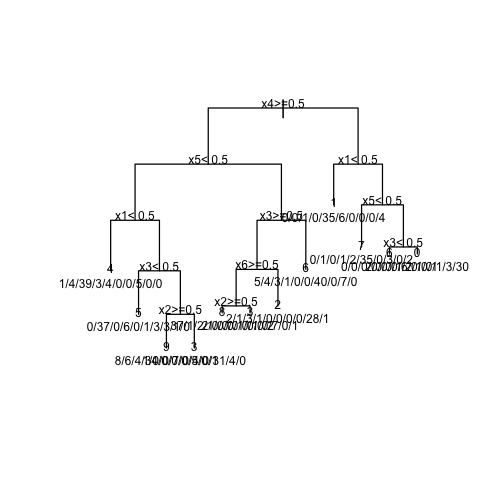

In [29]:
options(repr.plot.width=4,repr.plot.height=4)
plot(digits.rpart)
text(digits.rpart,use.n=TRUE,xpd=2,cex=0.6)

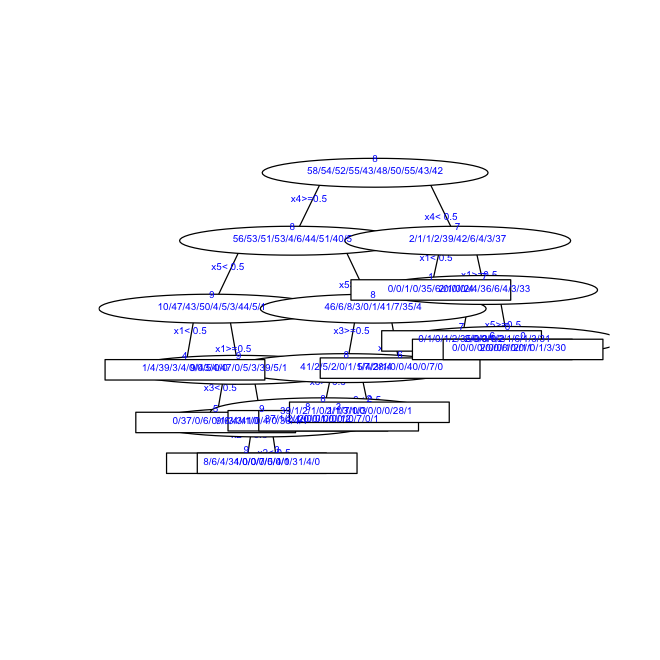

In [30]:
options(repr.plot.width=5.5,repr.plot.height=5.5)
plot(digits.rpart,branch=0.6,margin=0.2,lwd=2)
text(digits.rpart,use.n=TRUE,fancy=TRUE,fwidth=0.4,fheight=0.4,splits=TRUE,cex=0.5,all=TRUE,xpd=2,col="blue")

In [31]:
digits.rpart.pred<- predict(digits.rpart,digits.test, type = "class")
digits.rpart.conf<-table(True = digits.test$digit, Pred = digits.rpart.pred)
digits.rpart.conf

    Pred
True  8  5  4  9  1  7  6  3  2  0
   8  9  0  0  2  0  0  0  0  0  0
   5  1 11  1  1  0  0  0  0  0  0
   4  0  0  4  1  0  0  1  0  1  0
   9  1  1  1  5  0  0  0  1  0  0
   1  0  0  0  0  8  0  0  0  0  0
   7  0  0  0  0  2  7  0  1  0  0
   6  0  1  0  0  0  0 10  0  0  0
   3  0  1  1  2  0  0  0 11  0  0
   2  0  0  0  0  0  0  1  0  6  1
   0  0  0  0  0  1  0  0  0  0  6

#### Misclassification error estimate

In [32]:
n<-sum(digits.rpart.conf)
n1<-sum(diag(digits.rpart.conf))
P.err<-100*(n-n1)/n
round(P.err,3)

[1] 23

## Using bagging

In [35]:
require(rpart)
require(adabag)

In [ ]:
digits.bagging.pred<-predict.bagging(digits.bagging, newdata=digits.train)

# Prediction confusion matrix
digits.bagging.conf<-digits.bagging.pred$confusion
digits.bagging.conf

# Prediction error in classification
P.err<-1-sum(diag(digits.bagging.conf))/sum(digits.bagging.conf)
round(P.err,2)

## Using random forests

In [40]:
#install.packages("rpart",dependencies=TRUE,repos="https://cloud.r-project.org")
#install.packages("randomForest",dependencies=TRUE,repos="https://cloud.r-project.org")
require(rpart)
require(randomForest)

Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



In [41]:
digits.rf <- randomForest(digit ~ .,data=digits.train, mtry=4, importance=TRUE, proximity=TRUE)
print(digits.rf)


Call:
 randomForest(formula = digit ~ ., data = digits.train, mtry = 4,      importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 27%
Confusion matrix:
   8  5  4  9  1  7  6  3  2  0 class.error
8 30  1  2  5  0  0  5  2  0  2   0.3617021
5  1 29  1  4  0  0  4  1  0  0   0.2750000
4  0  0 37  3  2  0  0  1  2  0   0.1777778
9  0  2  4 30  0  1  1  6  1  1   0.3478261
1  0  0  4  0 27  2  0  1  0  1   0.2285714
7  0  0  1  2  3 25  0  6  1  0   0.3421053
6  3  2  0  0  0  0 34  0  0  0   0.1282051
3  0  2  0  4  0  3  0 27  3  1   0.3250000
2  1  0  1  0  0  1  1  1 29  1   0.1714286
0  3  0  0  1  2  2  1  1  1 24   0.3142857


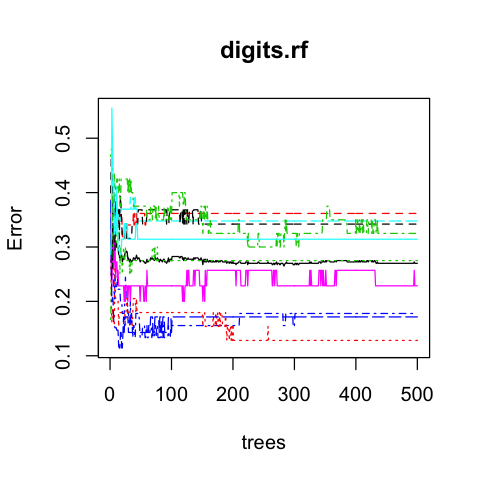

In [42]:
options(repr.plot.width=4,repr.plot.height=4)
plot(digits.rf)

The output of `plot(digits.rf)` is a graphical representation of the _OOB_ misclasification probability estimates, with four components, the first one is the average error and the other three the individual estimates for each of the three classes.

The `importance()` function returns values of relative importance towards prediction of each predictor variable. In the case of a classification this importance is disaggregated for each class. 

The `varImpPlot()` gives a diagram of these values.

,8,5,4,9,1,7,6,3,2,0,MeanDecreaseAccuracy,MeanDecreaseGini
x1,5.773197,6.218826,35.536604,19.829127,53.247939,19.225758,11.054322,7.111457,-1.324387,3.142555,56.29072,34.29007
x2,35.174175,39.203334,21.314412,25.272428,33.955595,5.072438,7.284702,44.554645,51.553715,5.529731,85.34626,37.54035
x3,20.031088,58.070626,12.211962,24.129758,5.495364,-6.791591,75.982523,18.461358,-2.041482,24.145879,84.68908,36.55309
x4,29.396010,15.093590,27.202915,20.870329,42.236918,33.670467,1.183937,14.970602,19.551491,59.724613,83.62026,37.07203
x5,49.352138,33.635831,16.211937,47.971559,8.162094,35.643961,59.762574,10.343184,16.372262,27.443557,95.03924,41.13617
x6,5.991739,4.718827,6.187042,1.460319,-1.148684,2.602568,9.458266,9.244634,75.021808,12.882255,59.04206,24.99616
x7,7.965638,6.796618,23.857771,22.640912,9.970093,25.207843,6.399645,8.933544,14.299663,6.686668,41.71282,25.24192


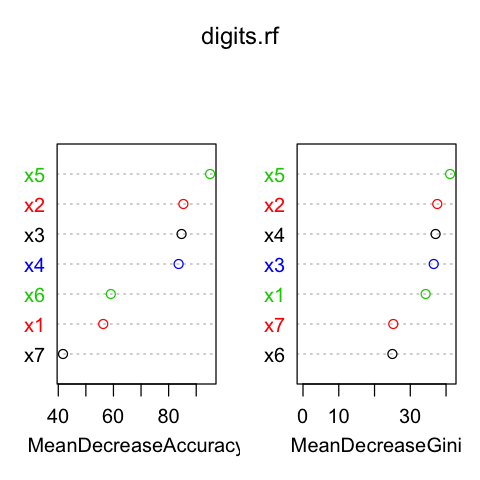

In [43]:
importance(digits.rf)
options(repr.plot.width=4,repr.plot.height=4)
varImpPlot(digits.rf,col=c(1,2,3,4))